In [1]:
"""
Created on Fri Jul 26 10:26:38 2019

@author: henok
"""
import PIL.Image as Image
from torchvision import models
import CNNFilterViusalizer as CNNVIS

ModuleNotFoundError: No module named 'CNNFilterViusalizer'

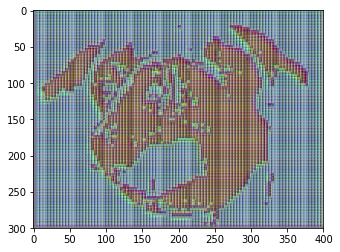

In [2]:
original_image = Image.open("./images/dog.jpg").convert('RGB')
# Example
vgg16 = models.alexnet(pretrained=True)
# vgg16 = models.vgg16()
pretrained_model = vgg16
# Guided backprop
GBP = CNNVIS.FilterVisualizer(pretrained_model)
grads = GBP.visualize(original_image, 1, 1, normalize=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


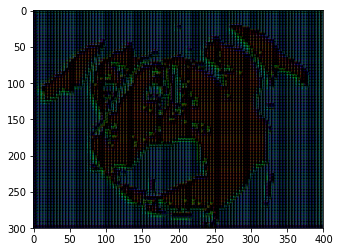

In [3]:
grads = GBP.visualize(original_image, 1, 1, normalize=False)

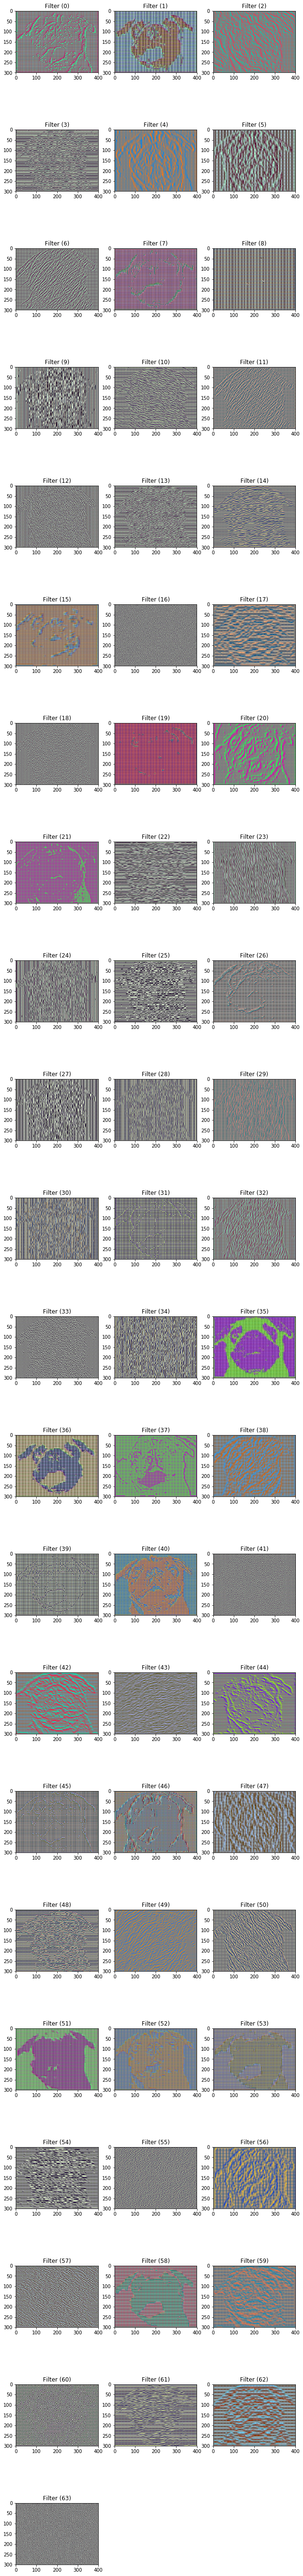

In [4]:
grads = GBP.visualize(original_image, 1, "all")